In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
demographic_df = pd.read_csv('./demographic_info.csv', delimiter=',')
nRow, nCol = demographic_df.shape
print(f'There are {nRow} rows and {nCol} columns')
print(f'Missing Values: \n{demographic_df.isnull().sum()}')
demographic_df.head()

There are 10 rows and 4 columns
Missing Values: 
subject ID    0
 age          0
 ethnicity    0
 gender       0
dtype: int64


subject ID   age    ethnicity  gender
0           0    25  Han Chinese       M
1           1    24  Han Chinese       M
2           2    31      English       M
3           3    28  Han Chinese       F
4           4    24      Bengali       M

In [7]:
eeg_df = pd.read_csv('./EEG_data.csv', delimiter=',')
nRow, nCol = eeg_df.shape
print(f'There are {nRow} rows and {nCol} columns')
print(f'Missing Values: \n{eeg_df.isnull().sum()}')
eeg_df.head()

There are 12811 rows and 15 columns
Missing Values: 
SubjectID             0
VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
dtype: int64


SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0              0.0   

   user-definedlabeln  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

                  Raw          Delta          Theta        Alpha1  \
SubjectID                                                           
0.0         33.042030  684941.555908  165919.786677  35990.755749   
1.0         33.599539  428179.287471  125888.289777  31765.673328   
2.0         33.904984   39549.890966   19263.661994   7781.796729   
3.0         34.219178  780844.464231  221221.465753  52551.698630   
4.0         38.635521  363673.088031  108926.853282  25011.400772   
5.0         34.487322  751906.218700  241902.458003  58220.128368   
6.0        348.143529  748472.609412  251335.407843  66816.250980   
7.0         36.307994  568962.452978  130318.122257  30058.974138   
8.0         35.666147  830712.153666  236931.875195  54706.961778   
9.0         29.070579  870734.973830  180547.519429  51447.114195   

                 Alpha2         Beta1          Beta2         Gamma1  \
SubjectID                                                             
0.0        24487.685964  2028

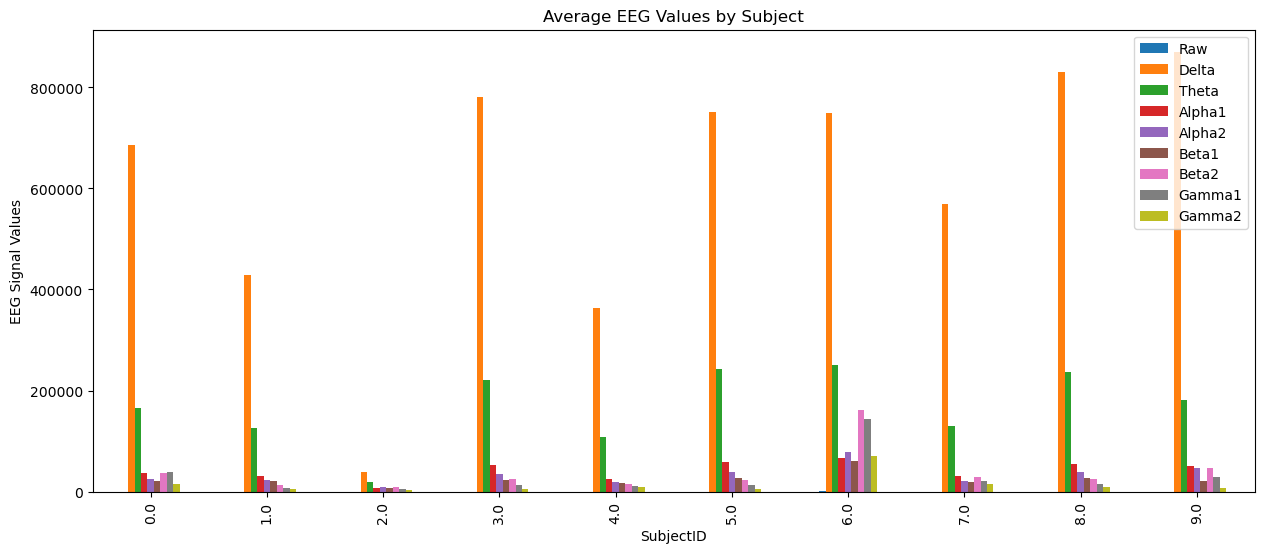

In [27]:
subject_means = eeg_df.groupby('SubjectID').mean()
print(subject_means[['Raw','Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']])
subject_means = eeg_df.groupby('SubjectID').mean()
subject_means[['Raw','Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']].plot(kind='bar', figsize=(15, 6))
plt.title('Average EEG Values by Subject')
plt.xlabel('SubjectID')
plt.ylabel('EEG Signal Values')
plt.legend(loc='upper right')
plt.show()

Subject 2 shows notably lower EEG values compared to other subjects, which could indicate a data quality issue, different recording conditions, or actual physiological differences. 

Subject 6 also appears to have much higher "Raw" values comparatively.

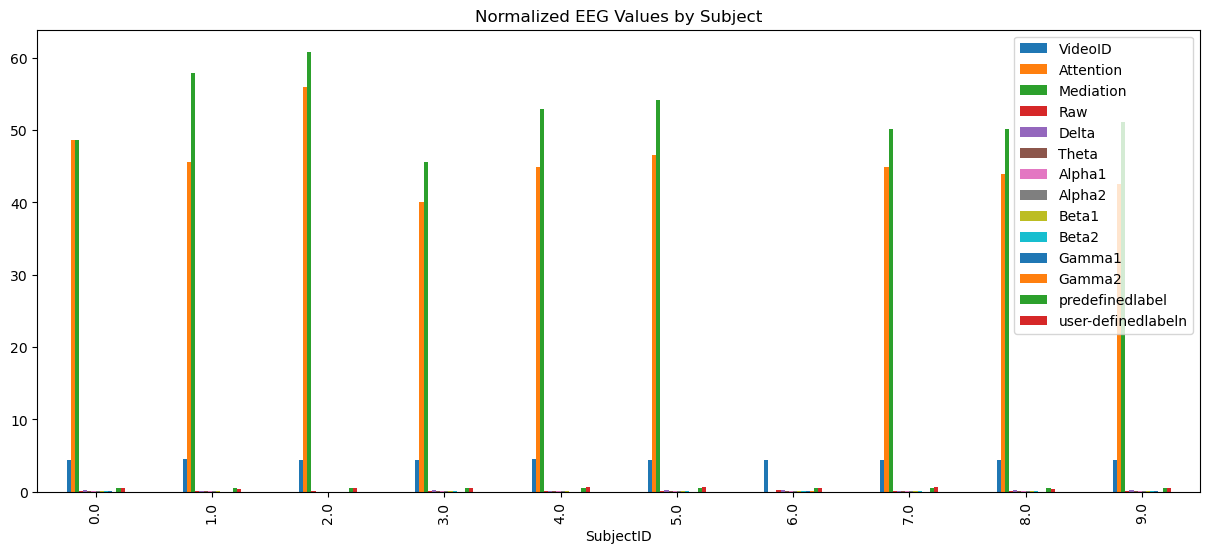

In [30]:
eeg_df_normalized = eeg_df.copy()
for col in ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2','Raw']:
    eeg_df_normalized[col] = eeg_df[col] / eeg_df[col].max()

# Revisualize after normalization
normalized_means = eeg_df_normalized.groupby('SubjectID').mean()
normalized_means.plot(kind='bar', figsize=(15, 6))
plt.title('Normalized EEG Values by Subject')
plt.show()

# Data Preprocessing

For this EEG dataset, averaging fields like **Attention**, **Mediation**, and frequency bands (e.g., *Delta, Theta, Alpha) across each video session provides a summary representation of each viewing experience. Since each video clip is split into multiple 0.5-second measurements, averaging reduces the data’s granularity and captures the overall brain activity patterns during the session, which helps simplify analysis and model training.

In [46]:
eeg_agg_df = eeg_df_normalized.groupby(['SubjectID', 'VideoID']).agg({
    'Attention': 'mean',
    'Mediation': 'mean',
    'Raw': 'mean',
    'Delta': 'mean',
    'Theta': 'mean',
    'Alpha1': 'mean',
    'Alpha2': 'mean',
    'Beta1': 'mean',
    'Beta2': 'mean',
    'Gamma1': 'mean',
    'Gamma2': 'mean',
    'user-definedlabeln': 'first'  # Assuming label is the same across rows for each video
}).reset_index()

demographic_df.rename(columns={'subject ID': 'SubjectID'}, inplace=True)
merged_df = pd.merge(eeg_agg_df, demographic_df, on='SubjectID', how='left')
merged_df.columns = merged_df.columns.str.strip()

merged_df.head()

SubjectID  VideoID  Attention  Mediation       Raw     Delta     Theta  \
0        0.0      0.0  55.256944  53.826389  0.022954  0.137292  0.041547   
1        0.0      1.0  43.621429  48.621429  0.014069  0.186583  0.053549   
2        0.0      2.0  43.978873  47.316901  0.006426  0.175066  0.049809   
3        0.0      3.0  51.057377  51.844262  0.016958  0.151545  0.054077   
4        0.0      4.0  55.224138  47.474138  0.014660  0.137875  0.042188   

     Alpha1    Alpha2     Beta1     Beta2    Gamma1    Gamma2  \
0  0.026785  0.025445  0.018832  0.024474  0.020648  0.012474   
1  0.025488  0.024662  0.020751  0.022737  0.018636  0.010770   
2  0.022259  0.021307  0.020499  0.022151  0.017191  0.010790   
3  0.024356  0.025844  0.016131  0.026563  0.021008  0.012283   
4  0.016872  0.016734  0.014943  0.022140  0.018263  0.010943   

   user-definedlabeln  age    ethnicity gender  
0                 0.0   25  Han Chinese      M  
1                 1.0   25  Han Chinese      M  
2                 1.0   25  Han Chinese      M  
3                 0.0   25  Han Chinese      M  
4                 0.0   25  Han Chinese      M

## Encoding Categorical Data and Sclaing Numerical Data
Encoding categorical data, like ethnicity and gender, is necessary because machine learning models require numerical input; encoding transforms these features into a format that models can interpret, allowing them to consider demographic factors in predicting outcomes.

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age']
categorical_features = ['ethnicity', 'gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
X_preprocessed = preprocessor.fit_transform(merged_df.drop(columns=['user-definedlabeln']))
len(X_preprocessed[0]), len(X_preprocessed)

(17, 100)

# Splitting the data

In [36]:
from sklearn.model_selection import train_test_split

y = merged_df['user-definedlabeln']

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 17), (20, 17), (80,), (20,))

# SVM Model

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.65

Ok that's pretty bad, lets try tuning some hyperparameters. This may take a while to I am implementing a loading bar so I don't lose my mind :p

In [19]:
!pip install tqdm

In [40]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid, cross_val_score

param_grid = {
    'C': np.logspace(-2, 4, 20),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': np.logspace(-4, 2, 20)
}
param_combinations = list(ParameterGrid(param_grid))


best_score = 0
best_params = None


for params in tqdm(param_combinations, desc="Grid Search Progress"):

    model = SVC(**params, random_state=42)
    

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Grid Search Progress: 100%|█████████████████| 1600/1600 [00:16<00:00, 99.18it/s]

Best Parameters: {'C': 4832.930238571752, 'gamma': 0.0008858667904100823, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.825


Accuracy of 82.5%, almost matching the results of the study. I am happy with this result.

# KNN Attempt 1

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.65

Not great, but surprisingly not actually that bad. Lets evaluate the accuracy amongst a range of Ks

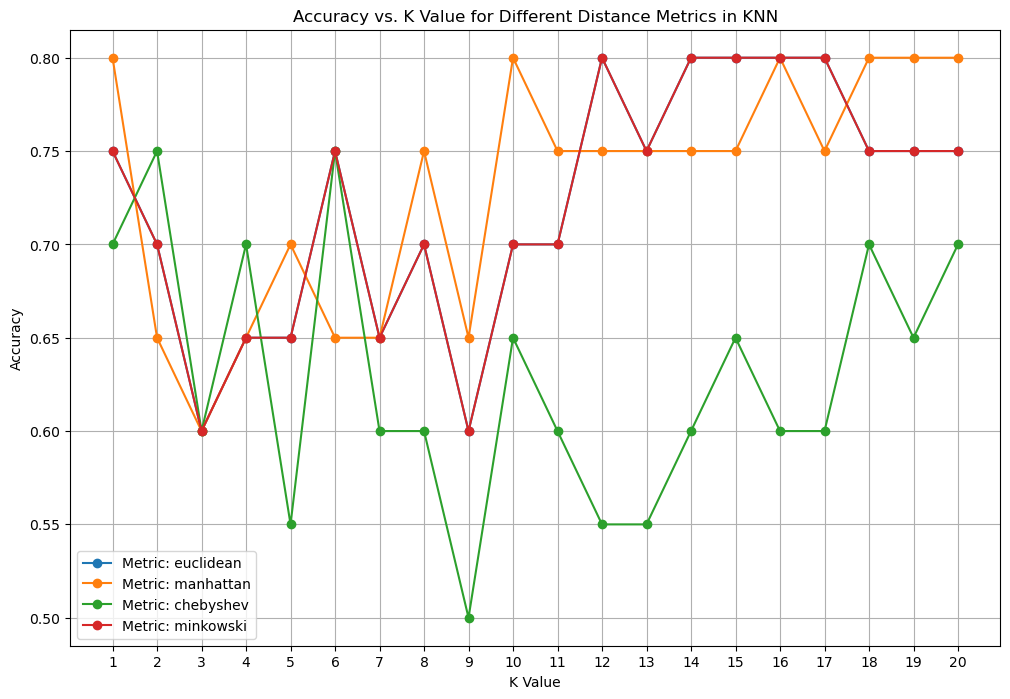

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']


results = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)

        results[metric].append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 8))
for metric, scores in results.items():
    plt.plot(k_values, scores, marker='o', label=f"Metric: {metric}")

plt.title("Accuracy vs. K Value for Different Distance Metrics in KNN")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


Hilarious that the K value I initially guessed (5) ended being far and beyond the worst example.

In [54]:
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
optimal_accuracy = max(accuracy_scores)

print(f"Optimal K: {optimal_k} \nOptimal Accuracy: {optimal_accuracy*100}%")

Optimal K: 12 
Optimal Accuracy: 80.0%


Not gonna lie, this is pretty OK :')

# MLP

MLP Accuracy: 0.70


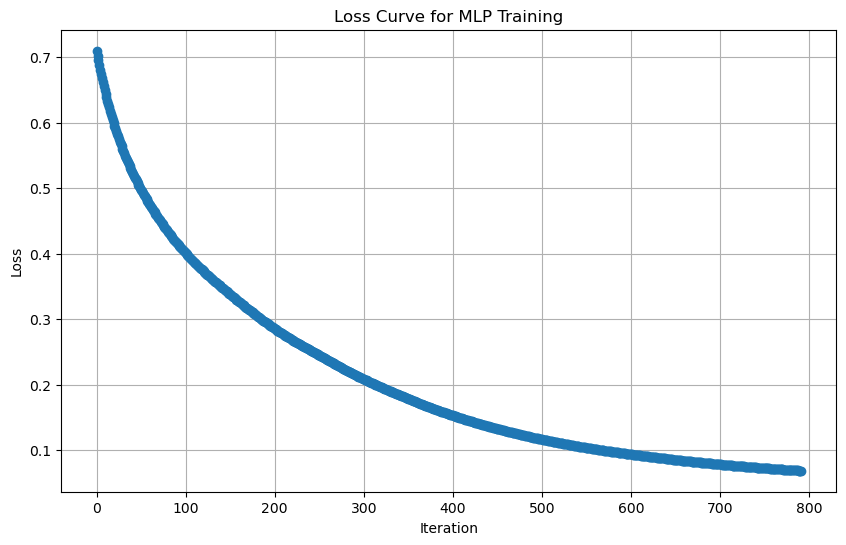

In [77]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu', 
    solver='adam',
    max_iter=1000, 
    random_state=42
)

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {mlp_accuracy:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, marker='o')
plt.title("Loss Curve for MLP Training")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

75% (with 500 iterations it is 70%) isn't that bad, maybe we can improve by tuning some hyperparameters.
Lets try different numbers of neurons and layers like: (50,), (100,), (50, 50), (100, 50, 25)
And since we have a smaller dataset, maybe lbfgs instead of adam as our solver could work. We can also adjust the activation function, although tbh i'm not sure anything will beat ReLu

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

hyperparameters = [
    # Variations in hidden_layer_sizes
    {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},

    # Variations in activation
    {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001},

    # Variations in solver
    {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001},
    {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001},
    {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001},
    {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001},
    {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.01},
    {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.01},

    # More diverse hidden layer sizes
    {'hidden_layer_sizes': (30, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (70,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (150, 75), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001},
    {'hidden_layer_sizes': (50, 25), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.01},
    {'hidden_layer_sizes': (100, 50, 25), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
]

best_model = None
best_accuracy = 0
results = []

for params in hyperparameters:
    print(f"Training with parameters: {params}")
    mlp_model = MLPClassifier(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        solver=params['solver'],
        alpha=params['alpha'],
        max_iter=2000,
        random_state=42
    )
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((params, accuracy))

    # Update the best model if the accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = mlp_model

    print(f"Test Accuracy: {accuracy:.4f}")
    
results.sort(key=lambda x: x[1], reverse=True)
print("\nBest Model Parameters:", results[0][0])
print("Best Test Accuracy:", results[0][1])

Training with parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7000
Training with parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7500
Training with parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7000
Training with parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7500
Training with parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7500
Training with parameters: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test Accuracy: 0.7500
Training with parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001}
Test Accuracy: 0.7000
Training with parameters: {'hidden_l

We were able to increase the accuracy to ~80%, I think that's fair and a marginal improvement

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

baseline_lr = LogisticRegression(random_state=42, max_iter=500)
baseline_lr.fit(X_train, y_train)

y_pred = baseline_lr.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Logistic Regression Test Accuracy: {baseline_accuracy:.2f}")

Baseline Logistic Regression Test Accuracy: 0.60


Not great, but we can improve it maybe

In [108]:
from sklearn.model_selection import cross_val_score

hyperparameters = [
    {'C': 0.0001, 'penalty': 'l2'},
    {'C': 0.001, 'penalty': 'l2'},
    {'C': 0.01, 'penalty': 'l2'},
    {'C': 0.1, 'penalty': 'l2'},
    {'C': 1, 'penalty': 'l2'},
    {'C': 10, 'penalty': 'l2'},
    {'C': 100, 'penalty': 'l2'},
    {'C': 0.01, 'penalty': 'l1'},
    {'C': 0.1, 'penalty': 'l1'},
    {'C': 1, 'penalty': 'l1'},
    {'C': 10, 'penalty': 'l1'},
    {'C': 100, 'penalty': 'l1'},
]

for params in hyperparameters:
    if params['penalty'] == 'l1':
        params['solver'] = 'liblinear'
    else:
        params['solver'] = 'lbfgs' 
results = []

for params in hyperparameters:
    print(f"Testing hyperparameters: {params}")
    model = LogisticRegression(max_iter=1000, random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append((params, accuracy_score(y_pred, y_test)))

results.sort(key=lambda x: x[1], reverse=True)

print("\nTop Hyperparameter Combinations:")
for params, score in results[:5]:
    print(f"Params: {params}, Testing Accuracy: {score:.4f}")

Testing hyperparameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Testing hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Testing hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Testing hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Testing hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Testing hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Top Hyperparameter Combinations:
Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}, Testing Accuracy: 0.6000
Pa

Looks like we can't crack 60% accuracy with logistic regression